In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Importing the dataset
from tensorflow.keras.datasets import mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [4]:
# Preprocessing 
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)
x_train = x_train/255
x_test = x_test/255

In [5]:
#One-Hot Encoding
from tensorflow.keras.utils import to_categorical
y_cat_train = to_categorical(y_train,num_classes=10)
y_cat_test = to_categorical(y_test,num_classes=10)

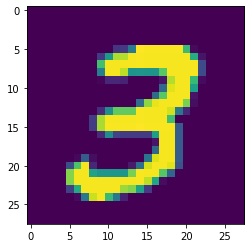

In [18]:
#Sample Image
plt.imshow(x_train[7].reshape(28,28))

In [6]:
#Creating the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
model = Sequential()
model.add(Conv2D(filters=32,activation='relu',kernel_size=(4,4),input_shape=(28,28,1)))
model.add(Conv2D(filters=64,activation='relu',kernel_size=(3,3),input_shape=(28,28,1)))
model.add(Conv2D(filters=64,activation='relu',kernel_size=(2,2),input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=10,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [7]:
#Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 23, 23, 64)        18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        16448     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               2

In [8]:
#Fit the training data to the model and using the test data for validation
model.fit(x=x_train,y=y_cat_train,epochs=27,validation_data=(x_test,y_cat_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/27
60000/60000 [==============================] - 52s 871us/sample - loss: 0.1232 - accuracy: 0.9608 - val_loss: 0.0530 - val_accuracy: 0.9821
Epoch 2/27
60000/60000 [==============================] - 65s 1ms/sample - loss: 0.0432 - accuracy: 0.9868 - val_loss: 0.0355 - val_accuracy: 0.9880
Epoch 3/27
60000/60000 [==============================] - 61s 1ms/sample - loss: 0.0302 - accuracy: 0.9902 - val_loss: 0.0318 - val_accuracy: 0.9898
Epoch 4/27
60000/60000 [==============================] - 43s 713us/sample - loss: 0.0234 - accuracy: 0.9925 - val_loss: 0.0425 - val_accuracy: 0.9868
Epoch 5/27
60000/60000 [==============================] - 42s 694us/sample - loss: 0.0189 - accuracy: 0.9937 - val_loss: 0.0356 - val_accuracy: 0.9898
Epoch 6/27
60000/60000 [==============================] - 42s 697us/sample - loss: 0.0136 - accuracy: 0.9957 - val_loss: 0.0273 - val_accuracy: 0.9921
Epoch 7/27
60000/60000 [========================

In [28]:
#Storing the results as Data Frame
results = pd.DataFrame(model.history.history)
results
#loss -> loss on training set
#accuracy -> accuracy on training set
#val_loss -> loss on validation set
#val_accuracy -> accuracy on validation set

,loss,accuracy,val_loss,val_accuracy
0,0.123216,0.960817,0.053032,0.9821
1,0.043204,0.986817,0.035467,0.9880
2,0.030191,0.990183,0.031807,0.9898
3,0.023429,0.992467,0.042528,0.9868
4,0.018867,0.993700,0.035567,0.9898
5,0.013568,0.995700,0.027317,0.9921
6,0.012612,0.995817,0.031371,0.9909
7,0.010138,0.996600,0.035731,0.9908
8,0.008290,0.997383,0.030387,0.9915
9,0.008048,0.997200,0.032518,0.9923


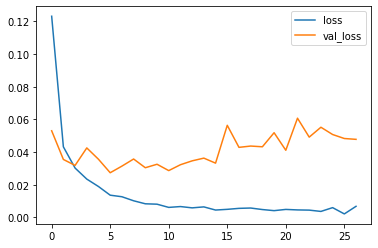

In [26]:
results[['loss','val_loss']].plot()

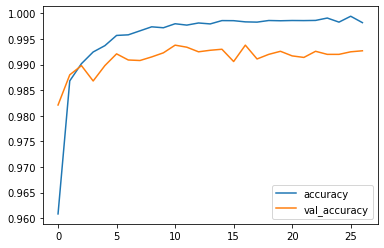

In [27]:
results[['accuracy','val_accuracy']].plot()

In [21]:
model.predict(x_test)

array([[4.4465135e-27, 7.4386448e-27, 6.4407317e-19, ..., 1.0000000e+00,
        1.0239128e-24, 2.8791389e-15],
       [5.9112059e-26, 4.6253760e-25, 1.0000000e+00, ..., 9.7272557e-32,
        4.3659871e-34, 6.1403229e-36],
       [7.9160896e-15, 1.0000000e+00, 3.3491731e-15, ..., 1.4223156e-17,
        2.0694197e-15, 5.7074917e-22],
       ...,
       [1.5106041e-38, 1.2287151e-26, 1.1030018e-27, ..., 1.4845116e-27,
        9.7054004e-22, 1.7450785e-25],
       [4.6449455e-27, 1.4041191e-35, 4.8963236e-32, ..., 1.2844228e-29,
        1.5626206e-17, 1.3587692e-23],
       [6.6874973e-19, 1.6849107e-24, 6.5672624e-19, ..., 3.8736993e-30,
        4.3469966e-17, 1.1197453e-24]], dtype=float32)

In [24]:
#Making prediction on x_test and storing the predictions and true values in a csv file 
predictions = model.predict_classes(x_test)

true_values = list(y_test)
predictions = list(predictions)
sub = pd.DataFrame({'True Values': true_values, 'Predictions': predictions})
sub.to_csv('./Predictions_VS_True-Values_MNIST.csv', index=False)